# Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score



In [2]:
numeric_df = pd.read_csv('../data/6_spotify_tracks_numeric.csv')
numeric_df.head()


,popularity,duration_ms,21st century classical,abstract,abstract hip hop,accordeon,accordion,acid house,acid jazz,acid rock,...,ye ye,yodeling,zarzuela,zilizopendwa,zolo,zouglou,zouk,zouk riddim,zydeco,release_year
0,14,150040,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2008
1,1,253000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2004
2,3,240400,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2011
3,1,138760,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2007
4,0,199986,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2022


# Scaling - MinMaxScaler

In [3]:
scaler = MinMaxScaler()
numeric_df_scaled = scaler.fit_transform(numeric_df)
numeric_df_scaled= pd.DataFrame(numeric_df_scaled, columns=numeric_df.columns)
numeric_df_scaled.head()    


,popularity,duration_ms,21st century classical,abstract,abstract hip hop,accordeon,accordion,acid house,acid jazz,acid rock,...,ye ye,yodeling,zarzuela,zilizopendwa,zolo,zouglou,zouk,zouk riddim,zydeco,release_year
0,0.164706,0.079038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.866142
1,0.011765,0.135982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.834646
2,0.035294,0.129014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.889764
3,0.011765,0.072799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.858268
4,0.000000,0.106662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.976378


In [4]:
numeric_df_scaled.to_csv('../data/7_tracks_minmax_scaled.csv', index=False)

# Standard scaling

In [5]:
scaler2 = StandardScaler()
numeric_df_standard = scaler2.fit_transform(numeric_df)
numeric_df_standard= pd.DataFrame(numeric_df_standard, columns=numeric_df.columns)
numeric_df_standard.head()    


,popularity,duration_ms,21st century classical,abstract,abstract hip hop,accordeon,accordion,acid house,acid jazz,acid rock,...,ye ye,yodeling,zarzuela,zilizopendwa,zolo,zouglou,zouk,zouk riddim,zydeco,release_year
0,0.110266,-0.794624,-0.016088,-0.011375,-0.052196,-0.025443,-0.037752,-0.037752,-0.016088,-0.034144,...,-0.06137,-0.044097,-0.011375,-0.056965,-0.053428,-0.016088,-0.037752,-0.022755,-0.050935,0.569907
1,-0.708051,0.157424,-0.016088,-0.011375,-0.052196,-0.025443,-0.037752,-0.037752,-0.016088,-0.034144,...,-0.06137,-0.044097,-0.011375,-0.056965,-0.053428,-0.016088,-0.037752,-0.022755,-0.050935,0.276223
2,-0.582156,0.040915,-0.016088,-0.011375,-0.052196,-0.025443,-0.037752,-0.037752,-0.016088,-0.034144,...,-0.06137,-0.044097,-0.011375,-0.056965,-0.053428,-0.016088,-0.037752,-0.022755,-0.050935,0.790169
3,-0.708051,-0.898928,-0.016088,-0.011375,-0.052196,-0.025443,-0.037752,-0.037752,-0.016088,-0.034144,...,-0.06137,-0.044097,-0.011375,-0.056965,-0.053428,-0.016088,-0.037752,-0.022755,-0.050935,0.496486
4,-0.770998,-0.332785,-0.016088,-0.011375,-0.052196,-0.025443,-0.037752,-0.037752,-0.016088,-0.034144,...,-0.06137,-0.044097,-0.011375,-0.056965,-0.053428,-0.016088,-0.037752,-0.022755,-0.050935,1.597799


In [6]:
numeric_df_standard.to_csv('../data/7_tracks_standard_scaled.csv', index=False)

## KMeans modeling

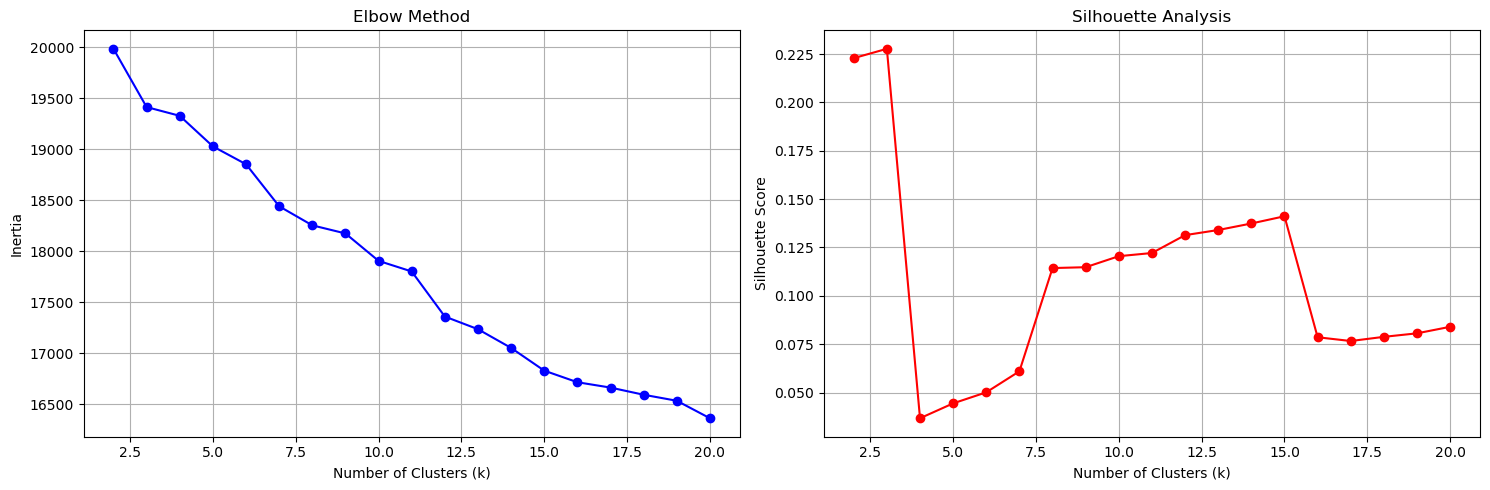

k=2: Silhouette Score=0.223
k=3: Silhouette Score=0.228
k=4: Silhouette Score=0.037
k=5: Silhouette Score=0.044
k=6: Silhouette Score=0.050
k=7: Silhouette Score=0.061
k=8: Silhouette Score=0.114
k=9: Silhouette Score=0.115
k=10: Silhouette Score=0.121
k=11: Silhouette Score=0.122
k=12: Silhouette Score=0.131
k=13: Silhouette Score=0.134
k=14: Silhouette Score=0.137
k=15: Silhouette Score=0.141
k=16: Silhouette Score=0.079
k=17: Silhouette Score=0.077
k=18: Silhouette Score=0.079
k=19: Silhouette Score=0.081
k=20: Silhouette Score=0.084

Optimal number of clusters based on highest silhouette score: 3


In [7]:
inertia = []
silhouette_scores = []
k_range = range(2, 21)  

# Calculate for both metrics 
for k in k_range:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(numeric_df_scaled)
    
    # Calculate and store inertia
    inertia.append(kmeans.inertia_)
    
    # Calculate and store silhouette score
    silhouette_scores.append(silhouette_score(numeric_df_scaled, labels))

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the elbow curve
ax1.plot(list(k_range), inertia, marker='o', linestyle='-', color='b')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method')
ax1.grid(True)

# Plot the silhouette scores
ax2.plot(list(k_range), silhouette_scores, marker='o', linestyle='-', color='r')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Analysis')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Print the silhouette scores for each k
for k, score in zip(k_range, silhouette_scores):
    print(f'k={k}: Silhouette Score={score:.3f}')

# Find the optimal k based on silhouette score
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f'\nOptimal number of clusters based on highest silhouette score: {optimal_k}')

In [8]:
# Train the model
# Select the optimal number of clusters (replace with your decision based on the elbow and silhouette methods)
#optimal_clusters = 7  # Example choice

# Train the KMeans model with the optimal number of clusters
# kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
# data['Cluster'] = kmeans.fit_predict(features)

# Save the labeled dataset
# data.to_csv('7_clustered_dataset.csv', index=False)
